# **Density-based spatial clustering (DBSCAN)**

DBSCAN documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

(800, 2) (200, 2)


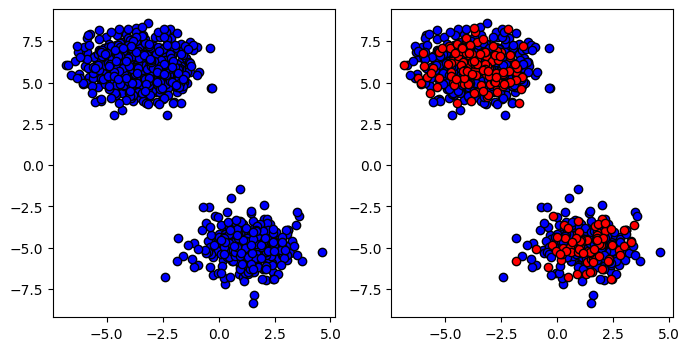

In [ ]:
# Generar los datos de muestra utilizando make_blobs
X, _ = make_blobs(n_samples=1000, n_features=2, random_state=69)

# Dividir los datos en conjuntos de entrenamiento y prueba (aunque no se utilicen aquí)
train_X, test_X = train_test_split(X, test_size=0.2, random_state=1)
print(train_X.shape, test_X.shape)

# Trama los puntos en un gráfico de dispersión
_, axes = plt.subplots(1,2, figsize=(8, 4))
axes[0].scatter(X[:, 0], X[:, 1], edgecolors = 'k', c='b')
axes[1].scatter(train_X[:,0], train_X[:,1], edgecolors = 'k', c = 'b')
axes[1].scatter(test_X[:,0], test_X[:,1], edgecolors = 'k', c = 'r')

plt.show()

In [ ]:
eps_value =  max(abs(X[:, 0].min() - X[:, 0].max()), abs(X[:, 1].min() - X[:, 1].max())) * 0.1  # Valor de epsilon (distancia máxima entre dos muestras para ser consideradas vecinas)
min_samples_value = 5  # Número mínimo de muestras dentro de la vecindad de un punto para considerarse como punto central

# Inicializar el modelo DBSCAN con los parámetros especificados
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

# Train DBSCAN
dbscan.fit(train_X)

DBSCAN(eps=1.6964862419650968)

In [ ]:
predictions = dbscan.fit_predict(test_X)

print(np.unique(predictions, return_counts = True))

(array([0, 1]), array([129,  71]))


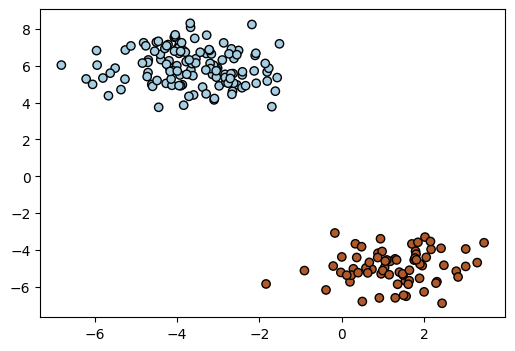

In [ ]:
_, ax = plt.subplots (figsize = (6,4))
ax.scatter(test_X[:, 0], test_X[:,1], c = predictions, cmap='Paired', edgecolor = 'k')


# **DBSCAN on real data**

Download the fruits data [here](https://drive.google.com/file/d/1M8tiAWDZclABJN1Meq9oEHCLJTNyHdpP/view?usp=share_link)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [ ]:
_


plt.scatter( _ , _ )
print (X.shape, y.shape)

In [ ]:
dbscan = DBSCAN(eps= _ , min_samples= _ )
dbscan.fit( _ )

In [ ]:
predictions = _

In [ ]:
# Plot
_

# **DBSCAN on images**

Use any of the following images:
 - [image1.jpeg](https://drive.google.com/file/d/1ehjQbNbSLTPOdnzZf5mtcokH-Irb9Hsq/view?usp=sharing)
 - [image2.png](https://drive.google.com/file/d/1RxivIbgi2eAG6p1myuxQGJs2zhGEsH_4/view?usp=sharing)
 - [image3.jpg](https://drive.google.com/file/d/1Pc_C9B_vqIxkLFV90RWSlRxRcTN-yKqF/view?usp=sharing)

In [ ]:
#Image segmentation from video using OpenCV and K-means clustering
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

(772, 436)
(150, 100)
(100, 150, 3) 45000


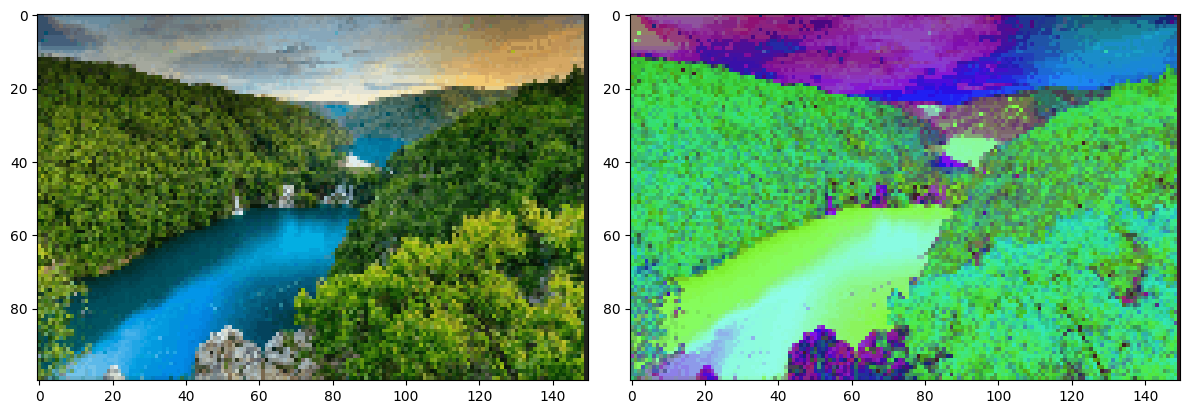

In [ ]:
original_image = Image.open("/content/image2.png")
print(original_image.size)
original_image = original_image.resize((150,100))
print(original_image.size)

# Converting from BGR Color Space to HSV
img_rgb = np.array(original_image.convert("RGB"))
img_hsv = np.array(original_image.convert("HSV"))
print(img_rgb.shape, img_hsv.size)

# Mostrar las imágenes RGB y HSV
_, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(img_rgb) #RGB
axes[1].imshow(img_hsv) #HSV
plt.tight_layout()
plt.show()

In [ ]:
vectorized_hsv = img_hsv[:,:,0].reshape(-1,1)
vectorized_hsv = np.float32(vectorized_hsv)

print(vectorized_hsv.shape)

(15000, 1)


In [ ]:
eps_value =  abs(img_hsv[:,:,0].min() - img_hsv[:,:, 0].max())*0.1  # Valor de epsilon (distancia máxima entre dos muestras para ser consideradas vecinas)
min_samples_value = int(len(vectorized_hsv) * 0.05)  # Número mínimo de muestras dentro de la vecindad de un punto para considerarse como punto central

# Inicializar el modelo DBSCAN con los parámetros especificados
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)

# Train DBSCAN
predictions = dbscan.fit_predict(vectorized_hsv)
print(np.unique(predictions, return_counts = True))
print(predictions.shape)


<ipython-input-68-7f0af8779cb8>:1: RuntimeWarning: overflow encountered in scalar subtract
  eps_value =  abs(img_hsv[:,:,0].min() - img_hsv[:,:, 0].max())*0.1  # Valor de epsilon (distancia máxima entre dos muestras para ser consideradas vecinas)


(array([-1,  0,  1]), array([   52,  4442, 10506]))
(15000,)


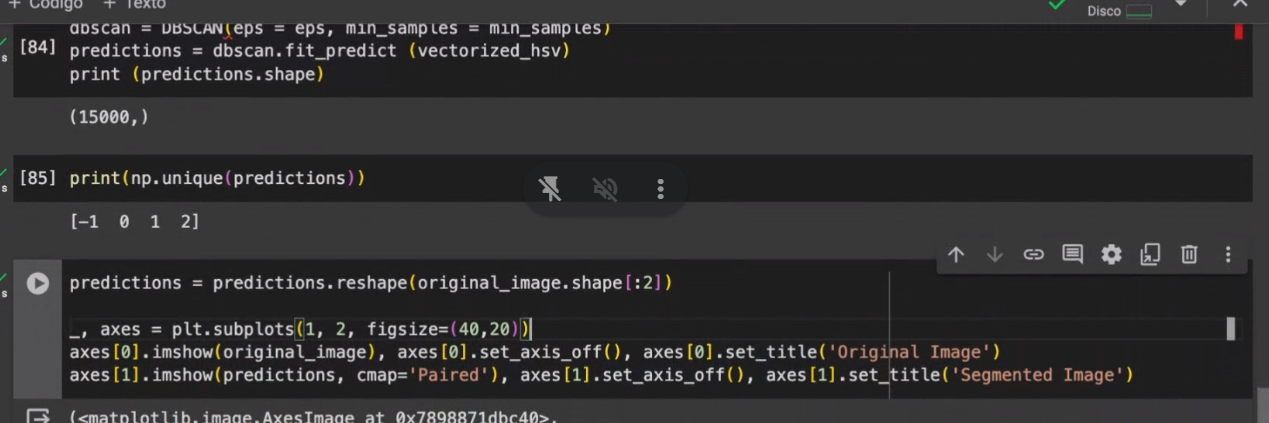

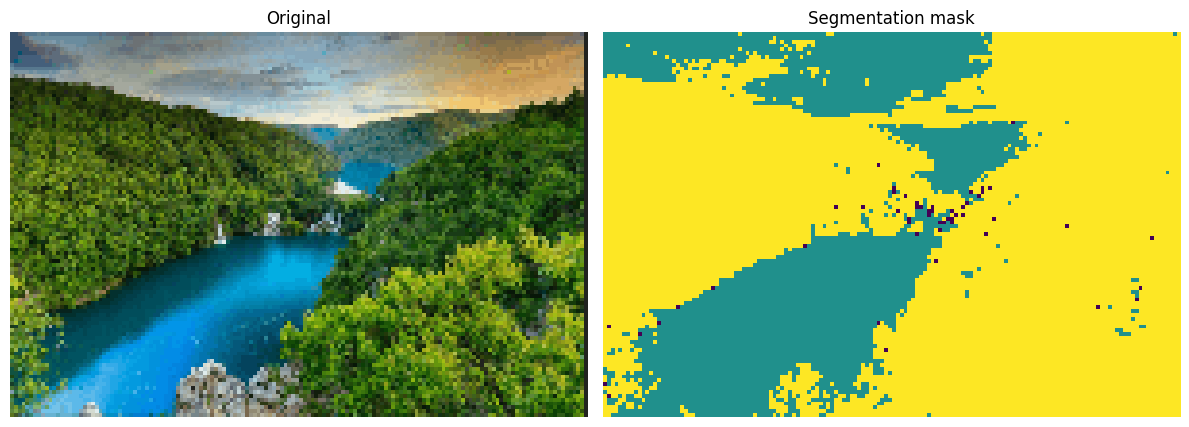

In [ ]:
predictions = predictions.reshape(img_rgb.shape[:2])

_, axes = plt.subplots (1, 2, figsize = (12,5))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( predictions ), axes[1].set_axis_off(), axes[1].set_title("Segmentation mask")
plt.tight_layout()

In [ ]:
import cv2

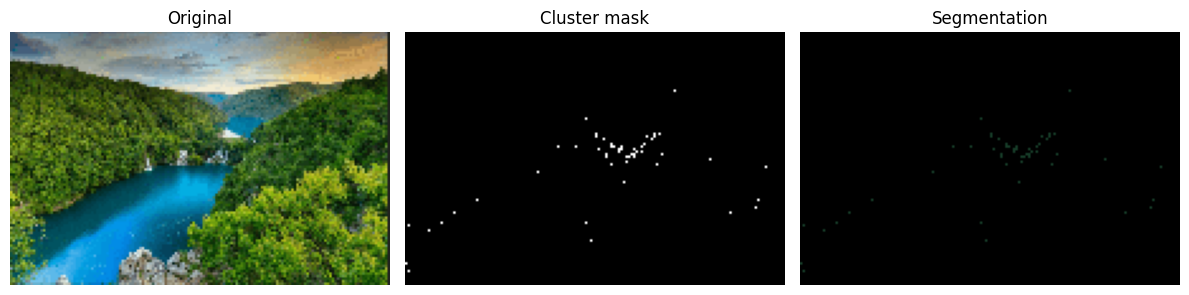

In [ ]:
# disable only the cluster number 2 (turn the pixel into black)
cluster = -1

cluster_mask = np.array (predictions == cluster, dtype = np.uint8)

masked_image = np.copy(img_rgb)
masked_image = cv2.bitwise_and(masked_image, masked_image, mask = cluster_mask)

_, axes = plt.subplots (1, 3, figsize = (12,5))
axes[0].imshow( img_rgb ), axes[0].set_axis_off(), axes[0].set_title("Original")
axes[1].imshow( cluster_mask , cmap="gray"), axes[1].set_axis_off(), axes[1].set_title("Cluster mask")
axes[2].imshow( masked_image ), axes[2].set_axis_off(), axes[2].set_title("Segmentation")
plt.tight_layout()